<a href="https://colab.research.google.com/github/YounesseELH/Machine-learning-Basics/blob/main/Linear%20Regression/Multivariable_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
from google.colab import files
import io
uploaded = files.upload()

Saving data_Reg_two_Variable.txt to data_Reg_two_Variable (1).txt


In [8]:
df = pd.read_csv(io.BytesIO(uploaded['data_Reg_two_Variable.txt']),header=None,names=['Size', 'Bedrooms', 'Price'],sep=",")


In [9]:
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [10]:
df.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


**Rescaling data**

In [11]:
df = (df-df.mean())/df.std()

In [12]:
df.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [13]:
df.describe()

,Size,Bedrooms,Price
count,4.700000e+01,4.700000e+01,4.700000e+01
mean,1.889741e-17,2.279500e-16,-8.031401e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.445423e+00,-2.851859e+00,-1.363666e+00
25%,-7.155897e-01,-2.236752e-01,-7.238702e-01
50%,-1.417900e-01,-2.236752e-01,-3.239979e-01
75%,3.376348e-01,1.090417e+00,3.521863e-01
max,3.117292e+00,2.404508e+00,2.874981e+00


In [14]:
df.insert(0, 'Ones', 1)

**separate X (training data) from y (target variable)**

In [16]:
cols = df.shape[1]
X2 = df.iloc[:,0:cols-1]
y2 = df.iloc[:,cols-1:cols]


**convert to matrices and initialize theta**

In [17]:
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

In [5]:
def CostF(x,y,theta):
  z = np.power(((x*theta.T)-y),2)
  return np.sum(z)/(2*len(x))

In [6]:
def gradientDescentF(x,y,theta,alpha,iters):
  temp = np.matrix(np.zeros(theta.shape))
  param = int(theta.ravel().shape[1])
  cost = np.zeros(iters)
  for i in range(iters):
    error = ((x*theta.T)-y)
    for j in range(param):
      term = np.multiply(error,x[:,j])
      temp[0,j] = theta[0,j]-((alpha/len(x))*np.sum(term))

    theta = temp
    cost[i] = CostF(x,y,theta)
  return theta,cost

In [18]:
alpha = 0.1
iters = 100

In [19]:
g2, cost2 = gradientDescentF(X2, y2, theta2, alpha, iters)
thiscost = CostF(X2, y2, g2)

**get best fit line for Size vs. Price**

In [20]:
x = np.linspace(df.Size.min(), df.Size.max(), 100)


In [21]:
f = g2[0, 0] + (g2[0, 1] * x)

**draw the line for Size vs. Price**

Text(0.5, 1.0, 'Size vs. Price')

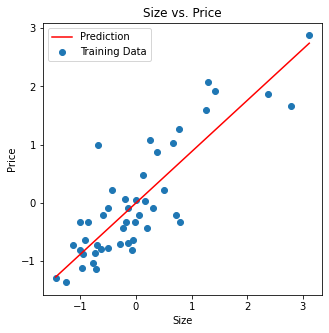

In [23]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(df.Size, df.Price, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Size vs. Price')


**get best fit line for Bedrooms vs. Price**



In [24]:
x = np.linspace(df.Bedrooms.min(), df.Bedrooms.max(), 100)
print('x \n',x)
print('g \n',g2)

f = g2[0, 0] + (g2[0, 1] * x)
print('f \n',f)


x 
 [-2.85185864 -2.79876402 -2.74566941 -2.69257479 -2.63948018 -2.58638556
 -2.53329095 -2.48019633 -2.42710172 -2.3740071  -2.32091249 -2.26781787
 -2.21472325 -2.16162864 -2.10853402 -2.05543941 -2.00234479 -1.94925018
 -1.89615556 -1.84306095 -1.78996633 -1.73687172 -1.6837771  -1.63068249
 -1.57758787 -1.52449326 -1.47139864 -1.41830403 -1.36520941 -1.3121148
 -1.25902018 -1.20592557 -1.15283095 -1.09973634 -1.04664172 -0.99354711
 -0.94045249 -0.88735788 -0.83426326 -0.78116865 -0.72807403 -0.67497942
 -0.6218848  -0.56879019 -0.51569557 -0.46260096 -0.40950634 -0.35641173
 -0.30331711 -0.25022249 -0.19712788 -0.14403326 -0.09093865 -0.03784403
  0.01525058  0.0683452   0.12143981  0.17453443  0.22762904  0.28072366
  0.33381827  0.38691289  0.4400075   0.49310212  0.54619673  0.59929135
  0.65238596  0.70548058  0.75857519  0.81166981  0.86476442  0.91785904
  0.97095365  1.02404827  1.07714288  1.1302375   1.18333211  1.23642673
  1.28952134  1.34261596  1.39571057  1.44880519

 **draw the line  for Bedrooms vs. Price**

Text(0.5, 1.0, 'Size vs. Price')

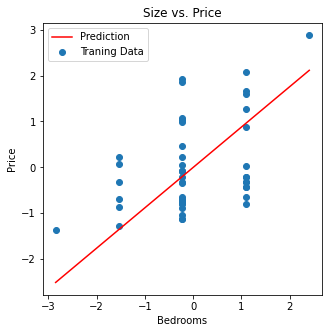

In [25]:

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(df.Bedrooms, df.Price, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Price')
ax.set_title('Size vs. Price')


 **draw error graph**

Text(0.5, 1.0, 'Error vs. Training Epoch')

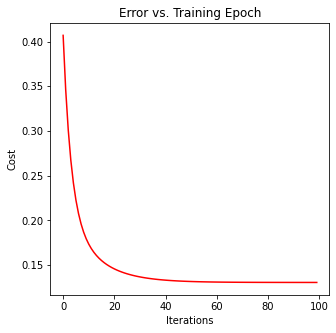

In [26]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
